In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [2]:
os.getcwd()

'C:\\Users\\umarf'

In [3]:
df=pd.read_csv('C:\\Users\\umarf\\Downloads\\adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.shape

(48842, 15)

In [8]:
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']

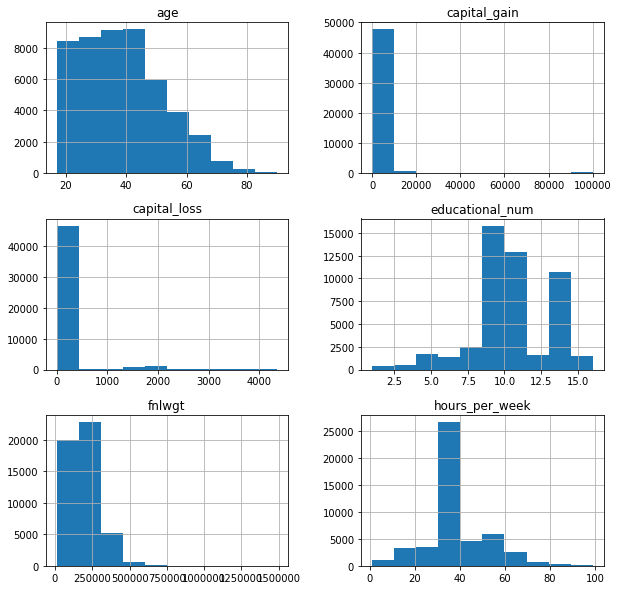

In [9]:
df.hist(figsize=(10,10))
plt.show()

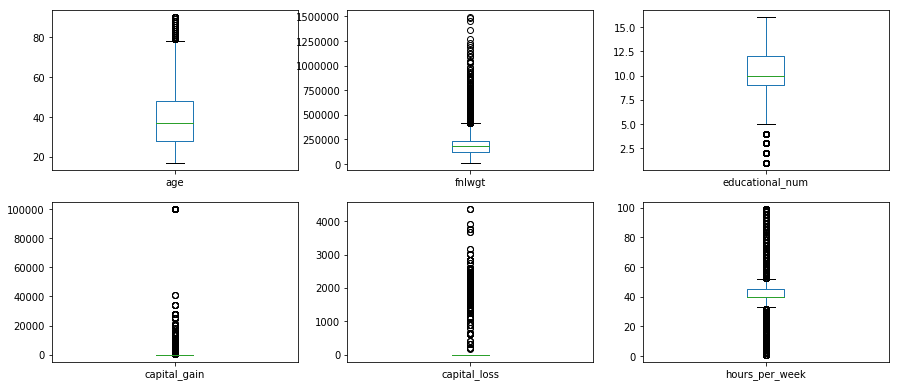

In [10]:
df.plot(kind='box',subplots=True,figsize=(15,10),layout=(3,3))
plt.show()

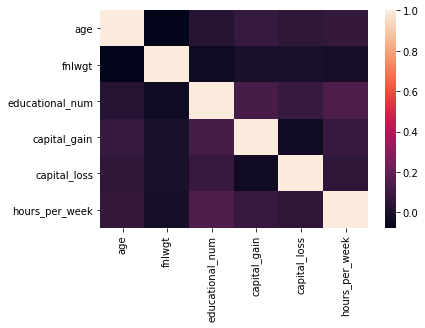

In [11]:
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

In [12]:
df.apply(lambda x: sum(x.isnull()))

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [13]:
df.apply(lambda x: len(x.unique()))

age                   74
workclass              9
fnlwgt             28523
education             16
educational_num       16
marital_status         7
occupation            15
relationship           6
race                   5
gender                 2
capital_gain         123
capital_loss          99
hours_per_week        96
native_country        42
income                 2
dtype: int64

In [14]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational_num     int64
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [15]:
cat_val=[x for x in df.dtypes.index if df.dtypes[x]=='object']
for i in cat_val:
    print('\nfrequency of categories in %s'%i)
    print(df[i].value_counts())


frequency of categories in workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

frequency of categories in education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

frequency of categories in marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_stat

In [16]:
df.workclass.replace(to_replace='?',value='Private',inplace=True)

In [17]:
cat_val=[x for x in df.dtypes.index if df.dtypes[x]=='object']
for i in cat_val:
    print('\nfrequency of categories in %s'%i)
    print(df[i].value_counts())


frequency of categories in workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

frequency of categories in education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

frequency of categories in marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

frequenc

In [18]:
#Combining education 
print(df['education'].value_counts())
df['education']=df['education'].replace({'HS-grad':'Graduate', 
                                        'Some-college':'Graduate',    
                                        'Bachelors':'Graduate',        
                                        'Masters':'Masters',          
                                        'Assoc-voc':'Masters',        
                                        '11th':'Non-Graduate',             
                                        'Assoc-acdm':'Masters',       
                                        '10th':'Non-Graduate',             
                                        '7th-8th':'Non-Graduate',           
                                        'Prof-school':'Masters',       
                                        '9th':'Non-Graduate',               
                                        '12th':'Non-Graduate',              
                                        'Doctorate':'Doctorate',         
                                        '5th-6th':'Non-Graduate',           
                                        '1st-4th':'Non-Graduate',           
                                        'Preschool':'Non-Graduate'})
df['education'].value_counts()


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


Graduate        34687
Masters          7153
Non-Graduate     6408
Doctorate         594
Name: education, dtype: int64

In [19]:
cat_val=[x for x in df.dtypes.index if df.dtypes[x]=='object']
for i in cat_val:
    print('\nfrequency of categories in %s'%i)
    print(df[i].value_counts())


frequency of categories in workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

frequency of categories in education
Graduate        34687
Masters          7153
Non-Graduate     6408
Doctorate         594
Name: education, dtype: int64

frequency of categories in marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

frequency of categories in occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355


In [20]:
df['workclass']=df['workclass'].replace({'Private':'Private',
                                        'Self-emp-not-inc':'Business',
                                        'Local-gov':'Government',
                                        'State-gov':'Government',
                                        'Self-emp-inc':'Business',         
                                        'Federal-gov':'Government',          
                                        'Without-pay':'Private',            
                                        'Never-worked':'Private'})           
                                        

In [21]:
df.occupation.replace(to_replace='?',value='Others-service',inplace=True)

In [22]:
df.native_country.replace(to_replace='?',value='Other',inplace=True)

In [23]:
cat_val=[x for x in df.dtypes.index if df.dtypes[x]=='object']
for i in cat_val:
    print('\nfrequency of categories in %s'%i)
    print(df[i].value_counts())


frequency of categories in workclass
Private       36736
Government     6549
Business       5557
Name: workclass, dtype: int64

frequency of categories in education
Graduate        34687
Masters          7153
Non-Graduate     6408
Doctorate         594
Name: education, dtype: int64

frequency of categories in marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

frequency of categories in occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others-service       2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces      

In [24]:
df.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,Non-Graduate,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,Graduate,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Government,336951,Masters,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Graduate,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Graduate,10,Never-married,Others-service,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
df.apply(lambda x: len(x.unique()))

age                   74
workclass              3
fnlwgt             28523
education              4
educational_num       16
marital_status         7
occupation            15
relationship           6
race                   5
gender                 2
capital_gain         123
capital_loss          99
hours_per_week        96
native_country        42
income                 2
dtype: int64

In [26]:
df.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,Non-Graduate,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,Graduate,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Government,336951,Masters,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Graduate,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Graduate,10,Never-married,Others-service,Own-child,White,Female,0,0,30,United-States,<=50K


In [27]:
LE=LabelEncoder()
cat=['workclass','fnlwgt','education','marital_status','occupation','relationship','race','gender','native_country']
for i in cat:
    df[i]=LE.fit_transform(df[i])

In [28]:
df.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,2,19329,3,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,2,4212,1,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,25340,2,12,2,11,0,4,1,0,0,40,39,>50K
3,44,2,11201,1,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,5411,1,10,4,8,3,4,0,0,0,30,39,<=50K


In [29]:
df.shape

(48842, 15)

In [30]:
x=df.drop(['income'],axis=1)
y=df['income']

In [31]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [33]:
#Spot Check algo
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB

models=[]
results=[]
names=[]
models.append(['LR',LogisticRegression()])
models.append(['DTC',DecisionTreeClassifier()])
models.append(['KNN',KNeighborsClassifier()])
#models.append(['SVM',SVC()])
models.append(['LDA',LDA()])
models.append(['NB',GaussianNB()])
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_score=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    names.append(name)
    results.append(cv_score)
    msg='%s:%f (%f)'%(name,cv_score.mean(),cv_score.std())
    print(msg)

LR:0.808180 (0.007746)
DTC:0.813350 (0.005440)
KNN:0.791698 (0.005147)
LDA:0.813503 (0.007918)
NB:0.803189 (0.008515)


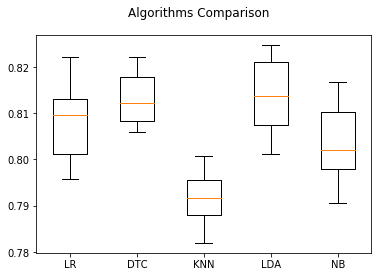

In [34]:
fig=plt.figure()
fig.suptitle('Algorithms Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
#spot check algo using scaling data
pipelines=[]
results=[]
names=[]
pipelines.append(('ScaledLR',Pipeline([('StandardScaler',StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledDTC',Pipeline([('StandardScaler',StandardScaler()),('DTC',DecisionTreeClassifier())])))
pipelines.append(('ScaledKNN',Pipeline([('StandardScaler',StandardScaler()),('KNN',KNeighborsClassifier())])))
pipelines.append(('ScaledLDA',Pipeline([('StandardScaler',StandardScaler()),('LDA',LDA())])))
pipelines.append(('ScaledNB',Pipeline([('StandardScaler',StandardScaler()),('NB',GaussianNB())])))

for name,model in pipelines:
    kfold=KFold(n_splits=10,random_state=7)
    cv_score=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    names.append(name)
    results.append(cv_score)
    msg='%s:%f (%f)'%(name,cv_score.mean(),cv_score.std())
    print(msg)

ScaledLR:0.825711 (0.006395)
ScaledDTC:0.814987 (0.005744)
ScaledKNN:0.828654 (0.005966)
ScaledLDA:0.813503 (0.007918)
ScaledNB:0.803906 (0.007976)


In [ ]:
#Tuning KNN
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
param_grid=dict(n_neighbors=[1,3,5,7,9,11,13,15,17,19,21])
model=KNeighborsClassifier()
kfold=KFold(n_splits=10,random_state=7)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring='accuracy',cv=kfold)
grid_result=grid.fit(rescaledx,y_train)
print('Best %f using %s')%(grid_result.best_score_,grid_result.best_params_)


In [ ]:
#Ensemble 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensemble=[]
ensemble.append('ADA',AdaBoostClassifier())
ensemble.append('GBC',GradientBoostingClassifier())
ensemble.append('RFC',RandomForestClassifier())
ensemble.append('ETC',ExtraTreesClassifier())
results=[]
names=[]
for name,model in ensembles:
    kfold=KFold(n_splits=10,random_state=7)
    cv_result=cross_val_score(model, x_train, y_train, scoring='accuracy', cv=kfold)
    results.append(cv_result)
    names.append(name)
    msg='%s:%f (%f)'%(name,cv_result.mean(),cv_result.std())
    print(msg)